In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## import fichier

In [8]:
students = pd.read_csv('students.csv', index_col=0)

## affichage 5 première/derniere valeurs

In [9]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,NaN,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
students.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,NaN,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,NaN,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


## affichage des types var

In [11]:
students.dtypes

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
G1              int64
G2              int64
G3              int64
dtype: object

In [12]:
print(students.columns.values)

['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Mjob'
 'Fjob' 'reason' 'guardian' 'traveltime' 'studytime' 'failures'
 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet'
 'romantic' 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences'
 'G1' 'G2' 'G3']


# Il existe trois types de variables : 
### Objects (string)
school, sex, adresses, famsize, pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romatic
### Int64
age, Medu, Fedu, studytime, failures, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3
### Float64
traveltime

In [ ]:
students.isna().sum()

In [ ]:
students['Mjob'].value_counts()
# on cherche si on peut remplacer les cases vides de Mjob par other

In [ ]:
students['Fjob'].value_counts()
# on cherche si on peut remplacer les case vide de Mjob par other

In [ ]:
# On créer un ntableau pour voir si il y a une corr entre Mjob et G3
# students_Mjob_NaN = students[students['Mjob'].isna()]
students_Mjob_NaN = students.dropna(subset=['Mjob'])

# on remplace les cases vides de Mjob & Fjob par Unknown
students.Mjob.fillna('unknown', inplace=True) 
students.Fjob.fillna('unknown', inplace=True) 

# Comportement général

### Statistiques sur les Notes

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

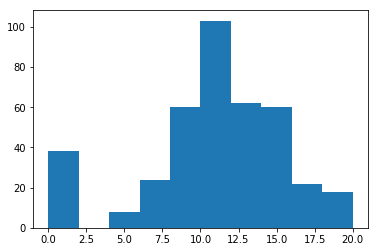

In [186]:
plt.hist(students['G3'])
students['G3'].describe() 

## Création d'une variable succès

In [14]:
students['sucess'] = [True if i >= 10 else False for i in students['G3']]

# Analyse Bi-Variée

### Coefficient de corrélation

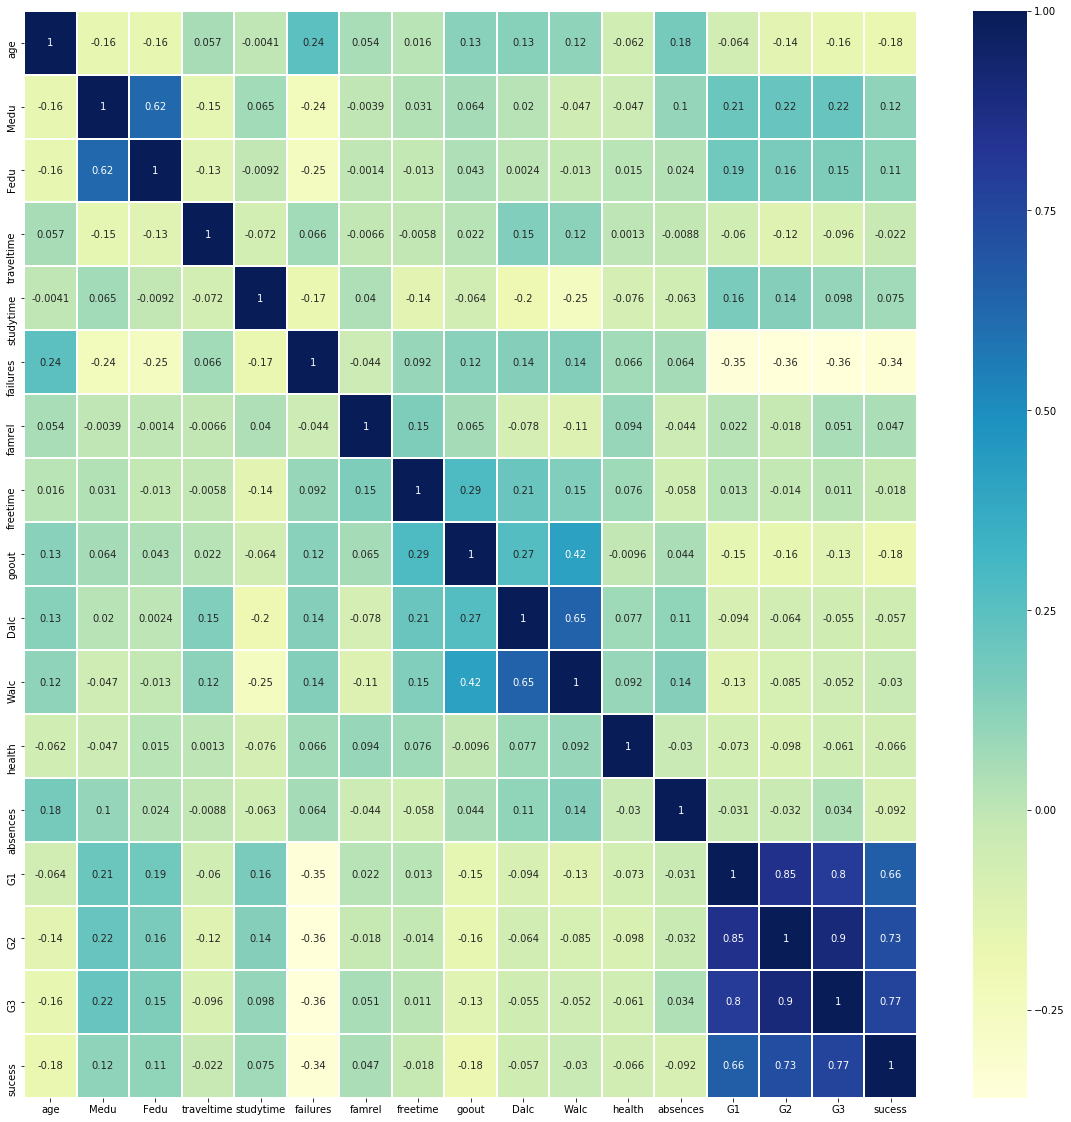

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(students.corr(), annot=True, linewidths=1, cmap="YlGnBu")

## On décide d'explorer plus particulierement les données possédant un coef de corrélation >0,75

## Corrélation des G1 G2 avec G3

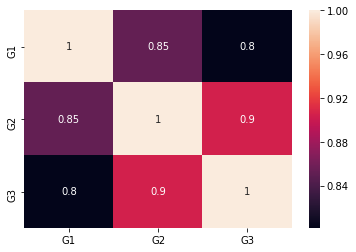

In [188]:
sns.heatmap(students[['G1','G2', 'G3']].corr(), annot=True)

### Notes G1

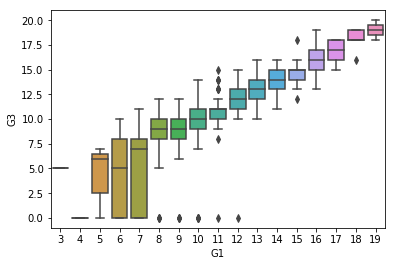

In [190]:
sns.boxplot(x='G1',y='G3',data=students)

#### Note au G1 en Fonction du sucess

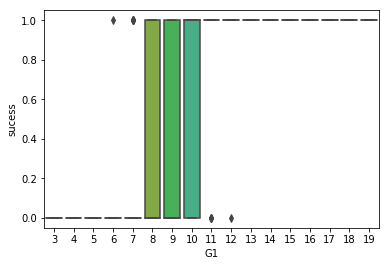

In [191]:
sns.boxplot(x='G1',y='sucess',data=students)

On remarque que toutes les personnes ayant eu moins de 5 au G1, n'ont pas réussi l'examen du G3. Toutes les personnes ayant eu plus de 13 ont réussi l'examen du G3.

## Notes G2

In [ ]:
sns.boxplot(x='G2',y='G3',data=students)

#### Note au G2 en Fonction du sucess

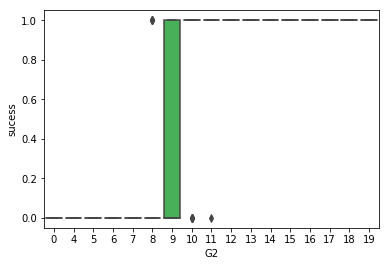

In [192]:
sns.boxplot(x='G2',y='sucess',data=students)

On remarque que toutes les personnes ayant eu moins de 7 au G2, n'ont pas réussi l'examen du G3. Toutes les personnes ayant eu plus de 12 ont réussi l'examen du G3.

### On fait des BOXPLOT pour chaque valeur en fonction de G3 pour savoir quelles sont les valeurs importantes à analyser 

Création d'une boucle For pour afficher tous les graphes en fonction de G3

In [ ]:
columns = list(students.columns.values)
for x in columns:
    plt.figure(x)
    sns.boxplot(x=students[x].dropna(), y =students.sucess)
    

### Age

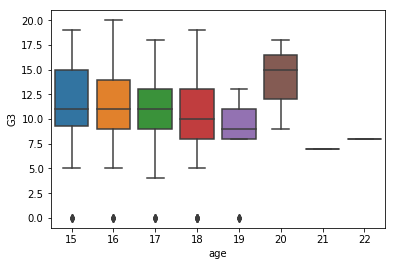

In [193]:
sns.boxplot(x='age',y='G3',data=students)

+20 ans 100% de réussite

### Mjob

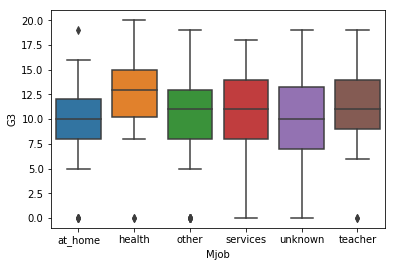

In [194]:
sns.boxplot(x='Mjob',y='G3',data=students)

Mere santé +75% de réussite

### Fjob

In [ ]:
sns.boxplot(x='Fjob',y='G3',data=students)

### Medu

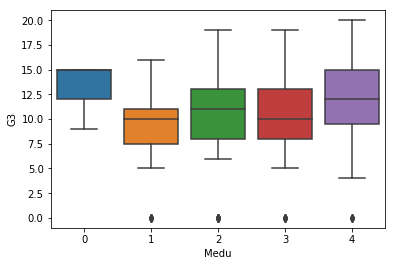

In [195]:
sns.boxplot(x='Medu',y='G3',data=students)

    les enfants dont les parents n'ont pas fait d'études sup ont plus de chance de réussir

### Fedu 

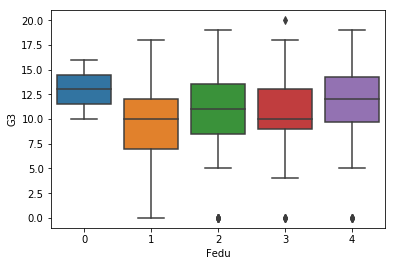

In [196]:
sns.boxplot(x='Fedu',y='G3',data=students)

### StudyTime

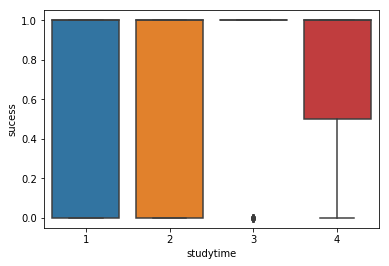

In [198]:
sns.boxplot(x = 'studytime', y= 'sucess', data=students)

au dessus de 5h de travail par semaine les éleves ont beaucoup plus de chance de réussir

### Failures

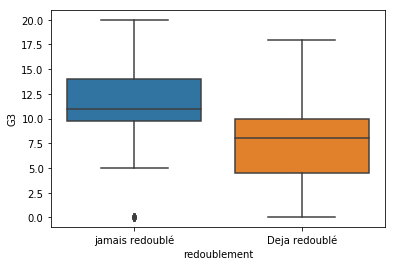

In [208]:
#tri des valeurs pour redoublement

students['redoublement'] = ['Deja redoublé' if i >= 1 else 'jamais redoublé' for i in students['failures']]
sns.boxplot(x = 'redoublement', y= 'G3', data=students)

les élèves qui n'ont jamais redoublé ont plus de chance de réussir

### Famrel

In [ ]:
sns.boxplot(x = 'famrel', y= 'G3', data=students)

### Freetime

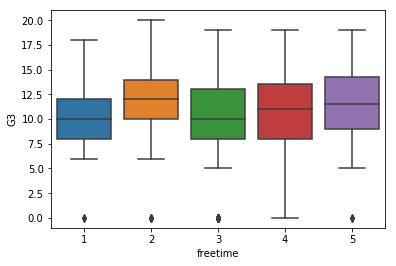

In [210]:
sns.boxplot(x = 'freetime', y= 'G3', data=students)

### Go Out

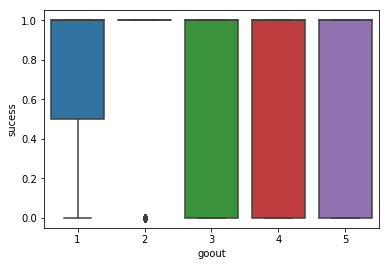

In [211]:
sns.boxplot(x = 'goout', y= 'sucess', data=students)

les élèves qui sortent peu ou pas ont pluqs de chance de réussir

### Dalc & Walc

In [ ]:
sns.boxplot(x = 'Dalc', y= 'G3', data=students)


In [ ]:
sns.boxplot(x = 'Walc', y= 'G3', data=students)

### Analyse Multi Variée

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


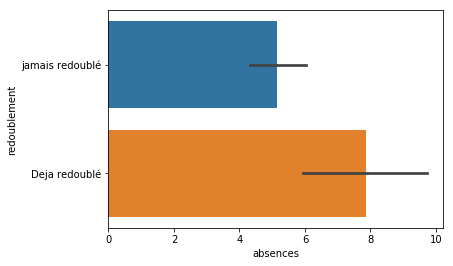

In [218]:
students['absences2'] = ['Plus de 12 absences' if i >= 12 else 'moins de 12 absences' for i in students['absences']]
students['redoublement'] = ['Deja redoublé' if i >= 1 else 'jamais redoublé' for i in students['failures']]
students['sucess2'] = [1 if i >= 10 else 0 for i in students['G3']]

#sns.barplot(x='sex', y='sucess', hue=None, data=students)
sns.barplot(x='absences', y='redoublement', hue=None, data=students)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


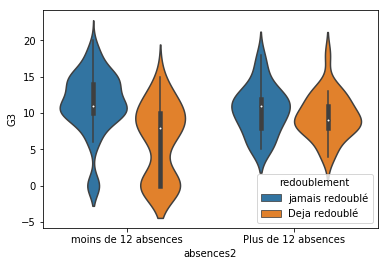

In [222]:
sns.violinplot(x='absences2', y='G3', hue='redoublement', data=students, fit_reg=False)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


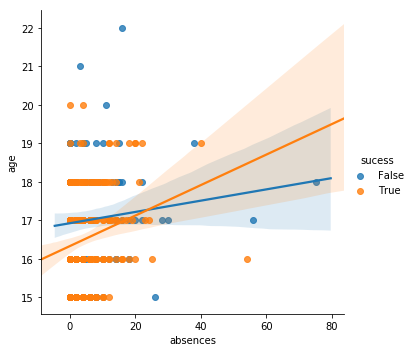

In [241]:
sns.lmplot(x='absences', y='age', hue='sucess', data=students)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


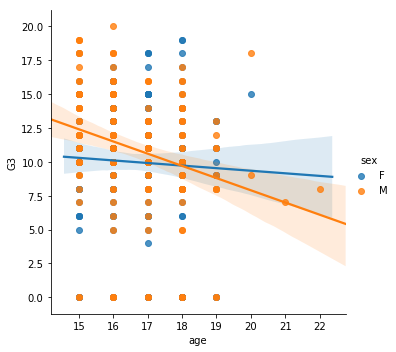

In [224]:
sns.lmplot(x='age', y='G3', hue='sex', data=students)

# Conclusion

Nous avons trouvés un lien fort entre le travail de la mère et les notes au G3. Il est préférable pour l'enfant que la mère travaille dans le secteur de la santé et que la mère soit à la maison. 

On observe que les enfants plus âgés qui ont échoué une ou plusieurs fois ont dmoins bonnes notes. Cela est particulierement vrai pour les garçons
